In [1]:
var('t')
K.<h> = NumberField(t^2-29)
field_to_reals2 = K.real_embeddings()
OK = K.ring_of_integers()
disc = K.absolute_discriminant()

In [2]:
R=5
f=(3-h)/2
eps=eps=(5+h)/2
etha=eps^2

In [3]:
def reduction(w1,w2):
    T, w = abs(w2/w1), w1
    if(field_to_reals2[0](w2)*field_to_reals2[1](w2)>0):
        T, w = abs(w1/w2), w2
    if T < 0:
        T = -T
    if T[1]<0 or (floor(T)<T[0]<ceil(T) and T[1] < min(a-floor(a),ceil(a)-a)):
        return 0
    return [w,-floor(T-2*T[1]*h)+T]

In [4]:
def reduction_integers(h):
    if disc%4 == 1:
        return reduction(1,(1+h)/2)
    if (disc//4)%4 == 2 or (disc//4)%4 == 3:
        return reduction(1,h)

In [5]:
tau=reduction_integers(h)[1]
tau

1/2*h + 7/2

In [6]:
bk_liste = continued_fraction_list(field_to_reals2[1](tau), type = 'hj', nterms=20); bk_liste

[7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2]

In [7]:
A_LAMBDA_tau = []; graph = []; A_LAMBDA1 = []
A0 = K(1)
Ak = A0
Ak_moins_1 = tau
k = 0

while Ak_moins_1 != etha^(-1):
    A_LAMBDA_tau.append(Ak); print(Ak); 
    Ak_plus_1 = bk_liste[k]*Ak - Ak_moins_1
    Ak_moins_1 = Ak; Ak = Ak_plus_1; k += 1

for ai in A_LAMBDA_tau:
    graph.append((field_to_reals2[1](ai),field_to_reals2[0](ai)))

1
-1/2*h + 7/2
-h + 6
-3/2*h + 17/2
-2*h + 11
-5/2*h + 27/2


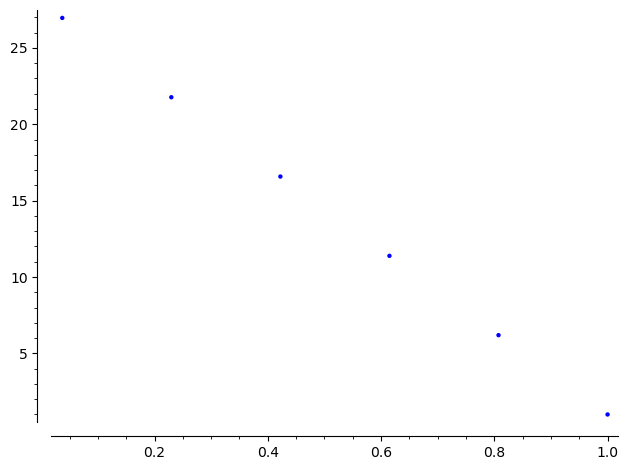

In [8]:
points(graph)

The following cell gets all the points such that are negative through the second embedding and are of height $R$.

In [9]:
S2=[]; n=0; 
S2_graph=[]
while abs(field_to_reals2[0](etha^n))+abs(field_to_reals2[1](etha^n))<R or abs(field_to_reals2[0](etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=a*A_LAMBDA_tau[j]*etha^n+b*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S2.append(-T)
                S2_graph.append((field_to_reals2[1](-T),field_to_reals2[0](-T)))
                b=b+1
                T=a*A_LAMBDA_tau[j]*etha^n+b*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n+1
n=-1
while abs(field_to_reals2[0](etha^n))+abs(field_to_reals2[1](etha^n))<R or abs(field_to_reals2[0](etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=a*A_LAMBDA_tau[j]*etha^n+b*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S2.append(-T)
                S2_graph.append((field_to_reals2[1](-T),field_to_reals2[0](-T)))
                b=b+1
                T=a*A_LAMBDA_tau[j]*etha^n+b*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n-1
n=0
while abs(field_to_reals2[0](eps*etha^n))+abs(field_to_reals2[1](eps*etha^n))<R or abs(field_to_reals2[0](eps*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](eps*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](eps*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](eps*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=a*eps*A_LAMBDA_tau[j]*etha^n+b*eps*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S2.append(T)
                S2_graph.append((field_to_reals2[1](T),field_to_reals2[0](T)))
                b=b+1
                T=a*eps*A_LAMBDA_tau[j]*etha^n+b*eps*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n+1
n=-1
while abs(field_to_reals2[0](etha^n*eps))+abs(field_to_reals2[1](etha^n*eps))<R or abs(field_to_reals2[0](eps*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](eps*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](eps*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](eps*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=a*eps*A_LAMBDA_tau[j]*etha^n+b*eps*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S2.append(T)
                S2_graph.append((field_to_reals2[1](T),field_to_reals2[0](T)))
                b=b+1
                T=a*eps*A_LAMBDA_tau[j]*etha^n+b*eps*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n-1

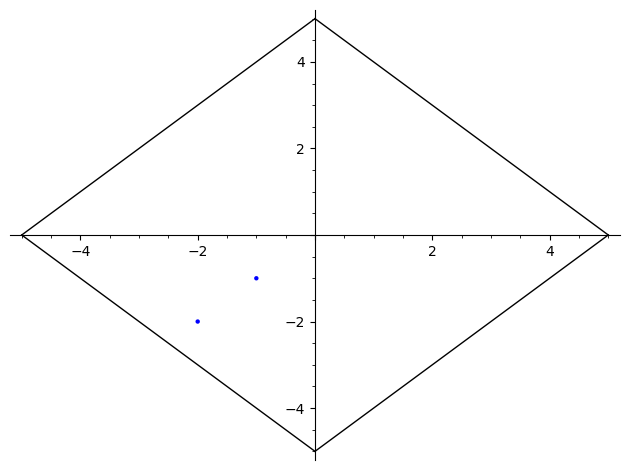

In [10]:
points(S2_graph)+plot(R-x,x,0,R,color='black')+plot(-R-x,x,-R,0,color='black')+plot(R+x,x,-R,0,color='black')+plot(x-R,x,0,R,color='black')

This function takes an element in $\mathcal{O}_K$ and finds its representation in the Shintani Domain taking the trivial signature (i.e. they are on the component that lies on the first quadrant).

In [11]:
def reduceshint(mu):
    if norm(mu)>0:
        if field_to_reals2[1](mu)<0:
            mu=-mu
    else:
        if field_to_reals2[1](mu)>0:
            mu=eps*mu          
        else:
            mu=-eps*mu
    while 1>field_to_reals2[0](mu)/field_to_reals2[1](mu):
        mu=mu/etha
    while field_to_reals2[0](-5/2*h + 27/2)/field_to_reals2[1](-5/2*h + 27/2)<=field_to_reals2[0](mu)/field_to_reals2[1](mu):
        mu=etha*mu
    return mu

Definition of the $b$-function
$$b_d(1/2):=\sum_{[\xi_1,\xi_2]\in R_d/\mathcal{O}_K^{\times}(f\infty)} (-1)^{W(\xi_2)}$$

In [12]:
def bfu(d):
    suma=0
    for A in divisors(d*OK):
        D1=reduceshint(A.gens_reduced()[0])
        d2=d/D1
        if d2+1 in f*OK:
            if field_to_reals2[0](d2)<0:
                suma-=1
            else:
                suma+=1
        d2=-d/D1
        if d2+1 in f*OK:
            if field_to_reals2[0](d2)<0:
                suma-=1
            else:
                suma+=1
        d2=d/(eps*D1)
        if d2+1 in f*OK:
            if field_to_reals2[0](d2)<0:
                suma-=1
            else:
                suma+=1
        d2=-d/(eps*D1)
        if d2+1 in f*OK:
            if field_to_reals2[0](d2)<0:
                suma-=1
            else:
                suma+=1
    return suma

Definition of the residuous function
$$R(r):=\sum_{d\in\mathcal{D}}-4\pi i\sqrt{d_K}|\mathbf{N}(f)|r\sum b_d(1/2)K_0(2\pi|d^{(1)}|r)e^{-2\pi|d^{(2)}|r}e^{-2\pi irx_r \mathbf{Tr}(d)}$$

In [13]:
def Rfu(r):
    suma=0
    for d in S2:
        suma+=(bfu(d)*bessel_K(0,(2*pi*abs(field_to_reals2[1](d))*r).n(digits=200))*exp(-2*pi*abs(field_to_reals2[0](d))*r)*exp(-2*pi*I*r*sqrt(r^(-1)-1)*(field_to_reals2[0](d)+field_to_reals2[1](d)))).n(digits = 200)
    return -4*r*pi*I*sqrt(disc)*abs(field_to_reals2[0](f)*field_to_reals2[1](f))*suma

Computation of the dul points

In [14]:
coef=-1/(h^2*f)

In [15]:
S3star=[]; n=0
S3_graphstar=[]
while abs(field_to_reals2[0](coef*etha^n))+abs(field_to_reals2[1](coef*etha^n))<R or abs(field_to_reals2[0](coef*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](coef*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](coef*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](coef*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=coef*a*A_LAMBDA_tau[j]*etha^n+coef*b*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S3star.append(T)
                S3_graphstar.append((field_to_reals2[1](T),field_to_reals2[0](T)))
                b=b+1
                T=coef*a*A_LAMBDA_tau[j]*etha^n+coef*b*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n+1
n=-1
while abs(field_to_reals2[0](coef*etha^n))+abs(field_to_reals2[1](coef*etha^n))<R or abs(field_to_reals2[0](coef*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](coef*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](coef*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](coef*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=coef*a*A_LAMBDA_tau[j]*etha^n+coef*b*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S3star.append(T)
                S3_graphstar.append((field_to_reals2[1](T),field_to_reals2[0](T)))
                b=b+1
                T=coef*a*A_LAMBDA_tau[j]*etha^n+coef*b*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n-1
n=0
while abs(field_to_reals2[0](coef*eps*etha^n))+abs(field_to_reals2[1](coef*eps*etha^n))<R or abs(field_to_reals2[0](coef*eps*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](coef*eps*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](coef*eps*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](coef*eps*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=coef*a*eps*A_LAMBDA_tau[j]*etha^n+coef*b*eps*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S3star.append(-T)
                S3_graphstar.append((field_to_reals2[1](-T),field_to_reals2[0](-T)))
                b=b+1
                T=coef*a*eps*A_LAMBDA_tau[j]*etha^n+coef*b*eps*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n+1
n=-1
while abs(field_to_reals2[0](coef*etha^n*eps))+abs(field_to_reals2[1](coef*etha^n*eps))<R or abs(field_to_reals2[0](coef*eps*etha^n*A_LAMBDA_tau[5]))+abs(field_to_reals2[1](coef*eps*etha^n*A_LAMBDA_tau[5]))<R:
    for j in range(0,len(A_LAMBDA_tau)-1):
        a=1; b=0
        while abs(field_to_reals2[0](coef*eps*etha^n*a*(A_LAMBDA_tau[j])))+abs(field_to_reals2[1](coef*eps*etha^n*a*(A_LAMBDA_tau[j])))<R:
            T=coef*a*eps*A_LAMBDA_tau[j]*etha^n+coef*b*eps*A_LAMBDA_tau[j+1]*etha^n
            while abs(field_to_reals2[0](T))+abs(field_to_reals2[1](T))<R:
                S3star.append(-T)
                S3_graphstar.append((field_to_reals2[1](-T),field_to_reals2[0](-T)))
                b=b+1
                T=coef*a*eps*A_LAMBDA_tau[j]*etha^n+coef*b*eps*A_LAMBDA_tau[j+1]*etha^n
            a=a+1; b=0
    n=n-1

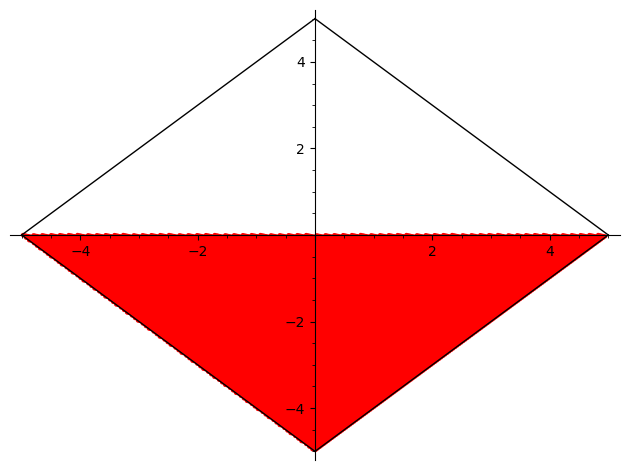

In [16]:
points(S3_graphstar,color='red')+plot(R-x,x,0,R,color='black')+plot(-R-x,x,-R,0,color='black')+plot(R+x,x,-R,0,color='black')+plot(x-R,x,0,R,color='black')

The dual $b$-function
$$b_d^{*}(1/2):=\sum_{[(\xi_1,\xi_2)]\in R_d^{*}/\mathcal{O}_K^{\times}(f\infty)}(-1)^{W(\xi_2)}e^{2\pi i\mathbf{Tr}(\xi_1)}$$

In [17]:
def bstar(d):
    suma=0
    for A in divisors(f*h^2*d*OK):
        d1=reduceshint((A.gens_reduced()[0]))/(f*h)
        d2=d/d1
        if d2 in (1/h)*OK:
            if field_to_reals2[0](d2)>0:
                suma+=exp(2*pi*I*(field_to_reals2[0](d1)+field_to_reals2[1](d1)))
                suma-=exp(2*pi*I*(field_to_reals2[0](-d1)+field_to_reals2[1](-d1)))
                suma-=exp(2*pi*I*(field_to_reals2[0](eps*d1)+field_to_reals2[1](eps*d1)))
                suma+=exp(2*pi*I*(field_to_reals2[0](-eps*d1)+field_to_reals2[1](-eps*d1)))
            if field_to_reals2[0](d2)<0:
                suma-=exp(2*pi*I*(field_to_reals2[0](d1)+field_to_reals2[1](d1)))
                suma+=exp(2*pi*I*(field_to_reals2[0](-d1)+field_to_reals2[1](-d1)))
                suma+=exp(2*pi*I*(field_to_reals2[0](eps*d1)+field_to_reals2[1](eps*d1)))
                suma-=exp(2*pi*I*(field_to_reals2[0](-eps*d1)+field_to_reals2[1](-eps*d1)))
    return suma

Definition of the dueal $R$-function
$$R^{*}(r):=-\frac{4\pi i}{\sqrt{d_K}}\sum b_d^{*}(1/2)K_0(2\pi|d^{(1)}|)e^{-2\pi|d^{(2)}|}e^{2\pi i x_r\mathbf{Tr}(d)}$$

In [18]:
def Rfustar(r):
    suma=0
    for d in S3star:
        suma+=(bstar(d)*bessel_K(0,(2*pi*abs(field_to_reals2[1](d))).n(digits=200))*exp(-2*pi*abs(field_to_reals2[0](d)))*exp(2*pi*I*sqrt(r^(-1)-1)*(field_to_reals2[0](d)+field_to_reals2[1](d)))).n(digits = 200)
    return (-4*pi*I/sqrt(disc))*suma

Definition of the $T$-function
$$T(r):=R(r)-\sqrt{r}(\sqrt{r^{-1}-1}-i)R^{*}(r)$$

In [19]:
def Tfun(r):
    return Rfu(r)-sqrt(r)*(sqrt(r^(-1)-1)-I)*Rfustar(r)

With all the functions defined before the zeta function is described as

In [20]:
def zetafu(r):
    M=matrix([[-r,sqrt(r)*(sqrt(r^(-1)-1)-I)],[-r^2,r*(sqrt(r^(-2)-1)-I)]])
    W=matrix([[Tfun(r)],[Tfun(r^2)]])
    return (M^(-1)*W)[0][0]/(abs(norm(f))*abs(disc))

In [ ]:
zetafu(1/2).n(digits=200)